# Thinkful code

### Much of this project is borrowed from a Thinkful drill

The function to iterate partial least squares regression at the bottom is borrowed and modified.

In [4]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
plt.style.use('ggplot')

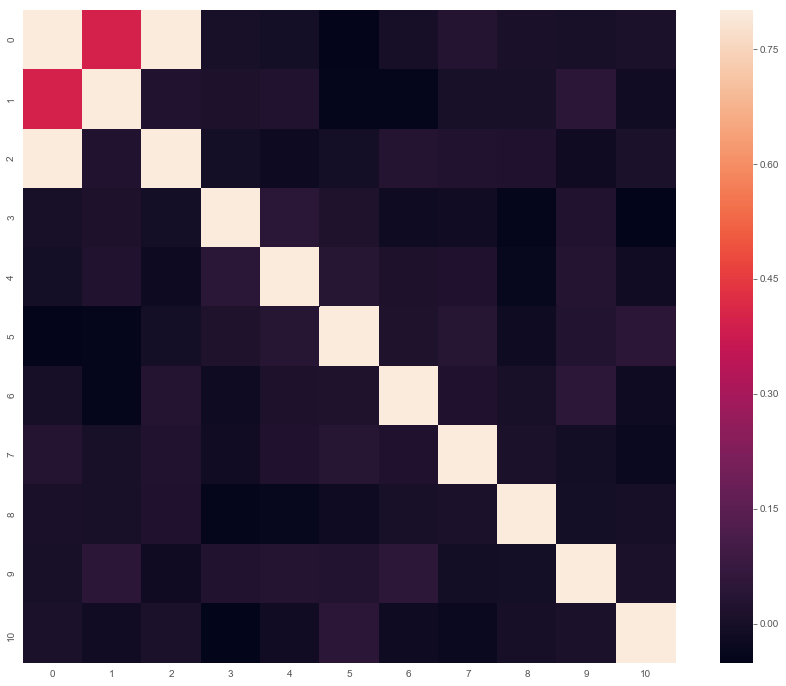

In [32]:
# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((1000, 10))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
fig, ax = plt.subplots(figsize=(16, 12))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8532272852410839
R-squared PLSR: 0.8532272427085076


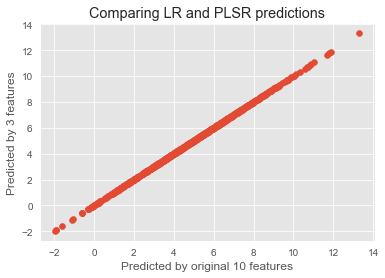

In [33]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Try different numbers of components to see results

Borrowed code and turned it into a function to iterate.

In [34]:
def PLS(components):
    PLS2 = PLSRegression(n_components=components)
    PLS2.fit(X, y)
    Y_PLS_pred2 = PLS2.predict(X)
    plt.scatter(Y_pred, Y_PLS_pred2)
    plt.xlabel('Predicted by original 10 features')
    plt.ylabel('Predicted by {} features'.format(str(components)))
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

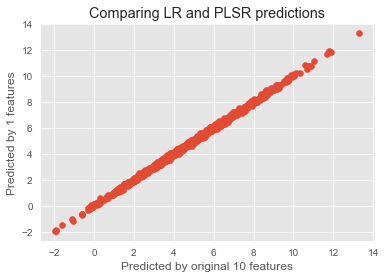

In [35]:
PLS(1)

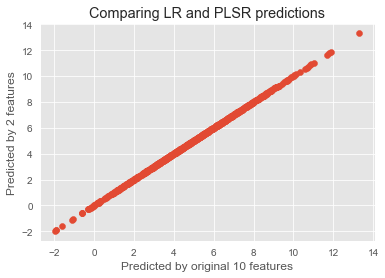

In [36]:
PLS(2)

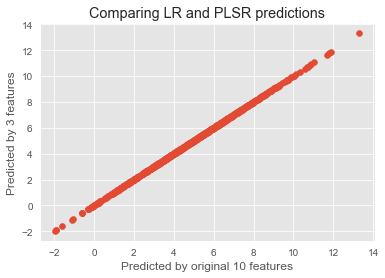

In [37]:
PLS(3)

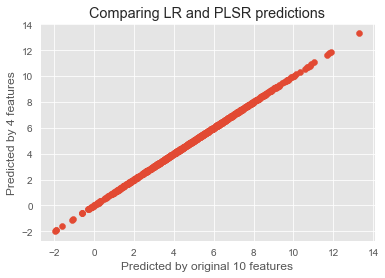

In [38]:
PLS(4)

## Effective feature reduction

The only visible difference of accuracy comes at the n_components = 1. This is an impressive approach!